In [0]:
pip install pillow

### Kaggle dataset load using jason from account and api from competition

In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install  kaggle

In [0]:
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c dogs-vs-cats

 95% 257M/271M [00:01<00:00, 158MB/s]
100% 271M/271M [00:02<00:00, 140MB/s]
 98% 530M/543M [00:03<00:00, 140MB/s]
100% 543M/543M [00:03<00:00, 146MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 74.0MB/s]


### Extract kaggle dataset

In [0]:
%cd .kaggle
!ls

[Errno 2] No such file or directory: '.kaggle'
/content
drive  kaggle.json  sample_data  sampleSubmission.csv  test1.zip  train.zip


In [0]:
!unzip -q "/content/train.zip"

In [0]:
!ls

drive	     sample_data	   test1.zip  train.zip
kaggle.json  sampleSubmission.csv  train


In [0]:
!mkdir '/content/drive/My Drive/Colab Notebooks'
!unzip '/content/train.zip' -d '/content/drive/My Drive/Colab Notebooks'

In [0]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/drive/My Drive/Colab Notebooks/train/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/My Drive/Colab Notebooks/augmented', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break

Using TensorFlow backend.


###Training a small convnet from scratch: 80% accuracy in 40 lines of code

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras import backend as K
from keras import optimizers

# dimensions of our image.
img_width, img_height =150,150

train_data_dir = '/content/drive/My Drive/Colab Notebooks/Cats VS Dogs/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/Cats VS Dogs/test'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 30
batch_size = 16

if K.image_data_format() == 'channels_first':
  input_shape = (3,img_width,img_height)
else:
  input_shape = (img_width,img_height,3)

model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

#rmsprop = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=1e-8, decay=0.0)
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

# Train data Augmentation Configuration:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
# Test data Augmentation Configuration:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width,img_height),
    batch_size = batch_size,
    class_mode = 'binary')
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_width,img_height),
    batch_size = batch_size,
    class_mode='binary')
model.fit_generator(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size
)

model.save_weights('/content/drive/My Drive/Colab Notebooks/Cats VS Dogs/first_try.h5')

Found 2003 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/30
125/125 [==============================] - 19s 153ms/step - loss: 0.7095 - acc: 0.5203 - val_loss: 0.6819 - val_acc: 0.5012
Epoch 2/30
125/125 [==============================] - 19s 152ms/step - loss: 0.6737 - acc: 0.5958 - val_loss: 0.6417 - val_acc: 0.6275
Epoch 3/30
125/125 [==============================] - 19s 150ms/step - loss: 0.6396 - acc: 0.6390 - val_loss: 0.6028 - val_acc: 0.6900
Epoch 4/30
125/125 [==============================] - 19s 150ms/step - loss: 0.6154 - acc: 0.6730 - val_loss: 0.6074 - val_acc: 0.6450
Epoch 5/30
125/125 [==============================] - 18s 147ms/step - loss: 0.5968 - acc: 0.6850 - val_loss: 0.6686 - val_acc: 0.6587
Epoch 6/30
125/125 [==============================] - 18s 147ms/step - loss: 0.5995 - acc: 0.7025 - val_loss: 0.5539 - val_acc: 0.7175
Epoch 7/30
125/125 [==============================] - 18s 148ms/step - loss: 0.5850 - acc: 0.7110 - val_los

### Bottleneck Approach

In [2]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications

# dimensions of our images.
img_width, img_height = 150, 150

top_model_weights_path = '/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/bottleneck_fc_model.h5'
train_data_dir = '/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/test'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

def save_bottlebeck_features():
    datagen = ImageDataGenerator(rescale=1. / 255)

    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')

    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_train = model.predict_generator(
        generator, nb_train_samples // batch_size)
    np.save(open('/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/bottleneck_features_train.npy', 'wb'),
            bottleneck_features_train)

    generator = datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)
    bottleneck_features_validation = model.predict_generator(
        generator, nb_validation_samples // batch_size)
    np.save(open('/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/bottleneck_features_validation.npy', 'wb'),
            bottleneck_features_validation)

def train_top_model():
    train_data = np.load(open('/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/bottleneck_features_train.npy','rb'))
    train_labels = np.array(
        [0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

    validation_data = np.load(open('/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/bottleneck_features_validation.npy','rb'))
    validation_labels = np.array(
        [0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

    model = Sequential()
    model.add(Flatten(input_shape=train_data.shape[1:]))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(train_data, train_labels,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(validation_data, validation_labels))
    model.save_weights(top_model_weights_path)
    model.evaluate(validation_data,validation_labels)


save_bottlebeck_features()
train_top_model()

Found 2003 images belonging to 2 classes.


KeyboardInterrupt: ignored

In [0]:
train_labels = np.array([0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

In [0]:
train_labels.shape

(2000,)

### Predict on image


In [34]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from keras import backend as K
# dimensions of our images.
img_width, img_height = 150, 150

top_model_weights_path = '/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/bottleneck_fc_model.h5'
train_data_dir = '/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/test'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50

datagen = ImageDataGenerator(rescale=1. / 255)

# build the VGG16 network
model = applications.VGG16(include_top=False, weights='imagenet')

generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
bottleneck_features_train = model.predict_generator(generator, nb_train_samples // batch_size)
np.save(open('/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/bottleneck_features_train.npy', 'wb'),
          bottleneck_features_train)

generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False)
bottleneck_features_validation = model.predict_generator(
        generator, nb_validation_samples // batch_size)
np.save(open('/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/bottleneck_features_validation.npy', 'wb'),
            bottleneck_features_validation)

train_data = np.load(open('/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/bottleneck_features_train.npy','rb'))
train_labels = np.array([0] * (nb_train_samples // 2) + [1] * (nb_train_samples // 2))

validation_data = np.load(open('/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/bottleneck_features_validation.npy','rb'))
validation_labels = np.array([0] * (nb_validation_samples // 2) + [1] * (nb_validation_samples // 2))

model = Sequential()
model.add(Flatten(input_shape=train_data.shape[1:]))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_data, train_labels,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(validation_data, validation_labels))
model.save_weights(top_model_weights_path)
model.save('/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/bottleneck_my_model.h5')
model.evaluate(validation_data,validation_labels)

Found 2003 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Train on 2000 samples, validate on 800 samples
Epoch 1/50
2000/2000 [==============================] - 1s 644us/step - loss: 0.6374 - acc: 0.7735 - val_loss: 0.5218 - val_acc: 0.7562
Epoch 2/50
2000/2000 [==============================] - 1s 418us/step - loss: 0.3848 - acc: 0.8390 - val_loss: 0.5902 - val_acc: 0.7712
Epoch 3/50
2000/2000 [==============================] - 1s 431us/step - loss: 0.2972 - acc: 0.8795 - val_loss: 0.3029 - val_acc: 0.8812
Epoch 4/50
2000/2000 [==============================] - 1s 421us/step - loss: 0.2635 - acc: 0.8990 - val_loss: 0.5719 - val_acc: 0.7850
Epoch 5/50
2000/2000 [==============================] - 1s 410us/step - loss: 0.2336 - acc: 0.9105 - val_loss: 0.2781 - val_acc: 0.9000
Epoch 6/50
2000/2000 [==============================] - 1s 394us/step - loss: 0.2084 - acc: 0.9200 - val_loss: 0.3550 - val_acc: 0.8875
Epoch 7/50
2000/2000 [==============================] 

[1.029271430708468, 0.89625]

(150, 150, 3)
(1, 150, 150, 3)


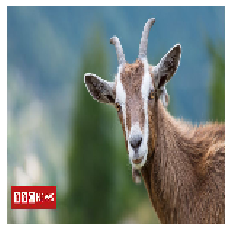

cats


In [72]:
from keras.preprocessing.image import load_img,img_to_array
from keras.preprocessing import image
from keras.models import load_model
from keras import backend as K
import matplotlib.pyplot as plt
topmodel = load_model('/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/bottleneck_my_model.h5')
model = applications.VGG16(include_top=False, weights='imagenet')


img = load_img('/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/testfinal/_98677794_gettyimages-486869012.jpg',target_size=(150,150))
x = img_to_array(img)
print(x.shape)
x = np.expand_dims(x,axis=0)
print(x.shape)

plt.imshow(img)                           
plt.axis('off')
plt.show()
features = model.predict(x/255.0)
classes = topmodel.predict_classes(features)
#topmodel.predict(features)
#print(classes)
if classes[0][0] == 1:
  print('dogs')
else: 
  print('cats')

(150, 150, 3)
(1, 150, 150, 3)


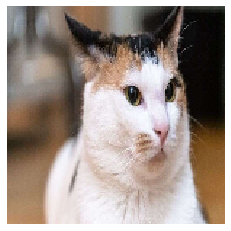

cats
(150, 150, 3)
(1, 150, 150, 3)


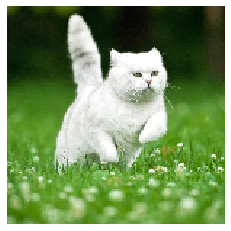

cats
(150, 150, 3)
(1, 150, 150, 3)


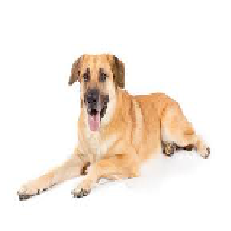

dogs
(150, 150, 3)
(1, 150, 150, 3)


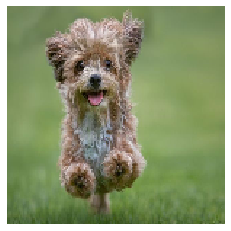

dogs


In [70]:
from keras.preprocessing.image import load_img,img_to_array
from keras.preprocessing import image
from keras.models import load_model
from keras import backend as K
import matplotlib.pyplot as plt
topmodel = load_model('/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/bottleneck_my_model.h5')
model = applications.VGG16(include_top=False, weights='imagenet')
for id in range(1,5): # taking folders all pictures
  mystr = '/content/drive/My Drive/Colab Notebooks/Pro 2:Cats VS Dogs/testfinal/test ('+str(id)+').jpg'
  img = load_img(mystr,target_size=(150,150))
  x = img_to_array(img) (150,150,3)
  print(x.shape)
  x = np.expand_dims(x,axis=0) #dimension (1,150,150,3)
  print(x.shape)

  plt.imshow(img)                           
  plt.axis('off')
  plt.show()
  # we are creating features from vgg16 model 
  features = model.predict(x/255.0)
  # then on these features we are modeling top model
  classes = topmodel.predict_classes(features)
#topmodel.predict(features)
#print(classes)
  if classes[0][0] == 1:
    print('dogs')
  else: 
    print('cats')




### Fine tuning

In [0]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model

# path to the model weights files.
weights_path = '../keras/examples/vgg16_weights.h5'
top_model_weights_path = '/content/drive/My Drive/Colab Notebooks/Cats VS Dogs/bottleneck_fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '/content/drive/My Drive/Colab Notebooks/Cats VS Dogs/train'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/Cats VS Dogs/test'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 50
batch_size = 16

# build the VGG16 network
model = applications.VGG16(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
print('Model loaded.')

# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
top_model.load_weights(top_model_weights_path)

# add the model on top of the convolutional base
# model.add(top_model) K: this doesn't work anymore
model = Model(inputs = model.input, outputs = top_model(model.output))

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# fine-tune the model
model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples)

Model loaded.
Found 2003 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Epoch 1/50


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:79: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., epochs=50, validation_data=<keras_pre..., steps_per_epoch=125, validation_steps=800)`


125/125 [==============================] - 77s 614ms/step - loss: 0.5931 - acc: 0.9250 - val_loss: 0.9970 - val_acc: 0.8975
Epoch 2/50
125/125 [==============================] - 74s 595ms/step - loss: 0.4884 - acc: 0.9350 - val_loss: 0.9970 - val_acc: 0.8975
Epoch 3/50
125/125 [==============================] - 74s 592ms/step - loss: 0.5625 - acc: 0.9300 - val_loss: 0.9970 - val_acc: 0.8975
Epoch 4/50
125/125 [==============================] - 73s 587ms/step - loss: 0.5264 - acc: 0.9298 - val_loss: 0.9970 - val_acc: 0.8975
Epoch 5/50
125/125 [==============================] - 74s 589ms/step - loss: 0.5468 - acc: 0.9315 - val_loss: 0.9970 - val_acc: 0.8975
Epoch 6/50
125/125 [==============================] - 73s 584ms/step - loss: 0.4637 - acc: 0.9380 - val_loss: 0.9970 - val_acc: 0.8975
Epoch 7/50
125/125 [==============================] - 73s 581ms/step - loss: 0.5382 - acc: 0.9295 - val_loss: 0.9970 - val_acc: 0.8975
Epoch 8/50
125/125 [==============================] - 72s 577ms/st